<a href="https://colab.research.google.com/github/LucaNoto/PF_CoderHouse/blob/main/Analise_ausentes_%26_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mortes ocorridas em São Paulo em 2019 à 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium
from folium import plugins

In [3]:
df=pd.read_csv('data/compiledData/dfMortesCompilado.csv')
df.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,NUM_VITIMA,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,...,COR_PELE,PROFISSAO,NATUREZA_APURADA,CRIME,DESDOBRAMENTO,DESCR_PERIODO,FLAG_VITIMA_FATAL,CONDUTA,COORPORACAO,SITUACAO
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,1.0,10108,2019-01-01 07:56:59,3,2019,S.PAULO,...,Branca,NAO INFORMADA,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
1,DECAP,1ª SEC,São Paulo,001 DP - Sé,1.0,10101,2019-01-18 16:32:41,372,2019,S.PAULO,...,Parda,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
2,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,10102,2019-01-25 22:53:07,490,2019,S.PAULO,...,Preta,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,10342,2019-01-20 00:15:18,534,2019,S.PAULO,...,Amarela,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
4,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,10342,2019-01-23 00:07:25,624,2019,S.PAULO,...,Branca,NAO INFORMADA,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN


## Quais são as nossas variáveis?

In [4]:
print("os nomes das variáveis :\n", list(df.columns))

os nomes das variáveis :
 ['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO', 'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'NUM_VITIMA', 'ID_DELEGACIA', 'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO', 'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO', 'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA', 'CRIME', 'DESDOBRAMENTO', 'DESCR_PERIODO', 'FLAG_VITIMA_FATAL', 'CONDUTA', 'COORPORACAO', 'SITUACAO']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3602 entries, 0 to 3601
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DEPARTAMENTO_CIRCUNSCRICAO  3602 non-null   object 
 1   SECCIONAL_CIRCUNSCRICAO     3602 non-null   object 
 2   MUNICIPIO_CIRCUNSCRICAO     3602 non-null   object 
 3   DP_CIRCUNSCRICAO            3602 non-null   object 
 4   NUM_VITIMA                  2549 non-null   float64
 5   ID_DELEGACIA                3602 non-null   object 
 6   DATAHORA_REGISTRO_BO        3597 non-null   object 
 7   NUM_BO                      3602 non-null   object 
 8   ANO_BO                      3602 non-null   object 
 9   MUNICIPIO_ELABORACAO        3602 non-null   object 
 10  DP_ELABORACAO               3602 non-null   object 
 11  SEC_ELABORACAO              3602 non-null   object 
 12  DEP_ELABORACAO              3602 non-null   object 
 13  DATA_FATO                   3602 

## Lidando com valores ausentes

In [6]:
# Quais são os valores totais ausentes no conjunto de dados ?
print("A base de dados possui: ", df.isna().sum().sum(),'dados ausentes')

A base de dados possui:  22366 dados ausentes


In [7]:
# Vamos contar o número de dados ausentes por coluna
missing_values = list(df.isna().sum())
# valores ausentes é uma lista do número de valores ausentes em cada coluna

cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # fazendo um dicionário para os valores ausentes

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Fazendo um dataframe personalizado a partir do dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others,NUM_VITIMA,DATAHORA_REGISTRO_BO,HORA_FATO,DESC_TIPOLOCAL,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,PROFISSAO,DESDOBRAMENTO,DESCR_PERIODO,FLAG_VITIMA_FATAL,CONDUTA,COORPORACAO,SITUACAO
Missing Values,0,1053,5,7,1,632,747,747,421,456,1126,2554,3602,2616,3125,2637,2637


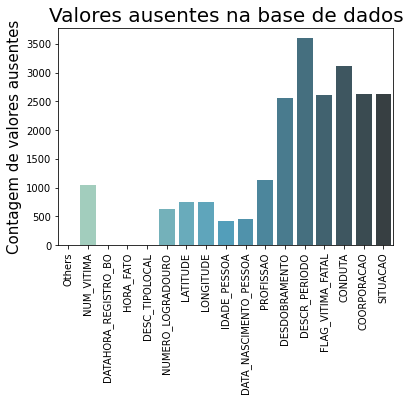

In [8]:
# Plotando os valores ausentes
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Valores ausentes na base de dados", fontdict = {'fontsize': 20})
plt.ylabel("Contagem de valores ausentes", fontdict={'fontsize': 15})
plt.show()

## Por que essa quantidade de valores ausentes ?


Ao analisar a base percebe-se que a maioria das informações que aparece como 'NaN' são sobre a situação da ocorrência. Como os dados são de 2019 à 2022 informações como 'desdobramento','Situação', entre outros.Ainda podem ser preenchidas ao fim do processo.<p>
 A variável 'FLAG_VITIMA_FATAL' só é preenchida quando ocorre flagrante, é um termo jurídico usado para indicar que um criminoso foi pego no momento em que cometia um crime, o que na maioria dos caso não ocorre.
Como neste estudo a gente só quer ver onde foi registrado o crime essas variáveis serão deletadas.<p>

Ainda temos alguns dados relevantes que também estão ausentes, dados como Latitude, Longitude, idade, etc. Como esses recursos não são valores numéricos diretos, não podemos usar funções estatísticas resumidas para preencher os valores ausentes.
Portanto, removeremos esses valores do conjunto de dados.<p>

In [9]:
#tirando as variáveis que possuem muitos valores ausentes
dfClean =df.drop(columns=['NUM_VITIMA','PROFISSAO','DESDOBRAMENTO','DESCR_PERIODO','FLAG_VITIMA_FATAL','CONDUTA','COORPORACAO','SITUACAO'])

In [10]:
dfClean = dfClean.dropna()

In [11]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 0 to 3599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   DEPARTAMENTO_CIRCUNSCRICAO  2446 non-null   object
 1   SECCIONAL_CIRCUNSCRICAO     2446 non-null   object
 2   MUNICIPIO_CIRCUNSCRICAO     2446 non-null   object
 3   DP_CIRCUNSCRICAO            2446 non-null   object
 4   ID_DELEGACIA                2446 non-null   object
 5   DATAHORA_REGISTRO_BO        2446 non-null   object
 6   NUM_BO                      2446 non-null   object
 7   ANO_BO                      2446 non-null   object
 8   MUNICIPIO_ELABORACAO        2446 non-null   object
 9   DP_ELABORACAO               2446 non-null   object
 10  SEC_ELABORACAO              2446 non-null   object
 11  DEP_ELABORACAO              2446 non-null   object
 12  DATA_FATO                   2446 non-null   object
 13  HORA_FATO                   2446 non-null   obje

In [12]:
#Quantos dados foram retidos após essa remoção
print(f'retidos na base: {round(len(dfClean)/len(df)*100,2)}%')

retidos na base: 67.91%


## Número de crimes distintos na cidade de São Paulo

In [27]:
crimes = dfClean['CRIME'].unique()
print("Número de crimes distintos na cidade de São Paulo:", len(crimes))
print()
print("Os Crimes são:\n", crimes)

Número de crimes distintos na cidade de São Paulo: 5

Os Crimes são:
 ['Homicídio Doloso' 'Morte Decorrente de Intervenção Policial'
 'Latrocínio' 'Lesão Corporal Seguida de Morte' 'Feminicidio']


In [18]:
dfClean['ANO_BO'].unique()

array(['2019', '2020', '2021', '2022',
       'SEM RESPOSTA DA DELEGACIA. CASO MANTIDO'], dtype=object)

In [23]:
start_lat_lon=[-23.58633467412642, -46.60418260319519]

coordenadas=[]
for lat,long in zip(dfClean.LATITUDE,dfClean.LONGITUDE):
  try:
    lat_float = float(lat)
    long_float = float(long)
    coordenadas.append([lat_float,long_float])
  except:
    pass

sp=folium.Map(location=[start_lat_lon[0],start_lat_lon[1]],zoom_start=10,tiles='cartodbpositron')
sp.add_child(plugins.HeatMap(coordenadas))
sp

In [9]:
crimedata2 = pd.DataFrame(df["CRIME"].value_counts().astype(int))
crimedata2.to_json("crimeagg.json")
crimedata2 = crimedata2.reset_index()
crimedata2.columns = ["District", "Number"]

## Analise Univariada

In [44]:
dfClean.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,...,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,NATUREZA_APURADA,CRIME
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,10108,2019-01-01 07:56:59,3,2019,S.PAULO,08º D.P. BRAS,...,400,-23.5462154481364,-46.631733309032,Vítima,Masculino,62.0,1956-04-20 00:00:00,Branca,HOMICÍDIO DOLOSO,Homicídio Doloso
1,DECAP,1ª SEC,São Paulo,001 DP - Sé,10101,2019-01-18 16:32:41,372,2019,S.PAULO,01º D.P. SE,...,8,-23.5546896292896,-46.6296510483604,Vítima,Masculino,44.0,1974-10-06 00:00:00,Parda,HOMICÍDIO DOLOSO,Homicídio Doloso
3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-20 00:15:18,534,2019,S.PAULO,78º D.P. JARDINS,...,542,-23.560415289045,-46.6337071030673,Vítima,Masculino,40.0,1978-11-23 00:00:00,Amarela,HOMICÍDIO DOLOSO,Homicídio Doloso
4,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-23 00:07:25,624,2019,S.PAULO,78º D.P. JARDINS,...,1645,-23.5629637062019,-46.6455014429631,Vítima,Feminino,57.0,1961-08-25 00:00:00,Branca,HOMICÍDIO DOLOSO,Homicídio Doloso
8,DECAP,2ª SEC,São Paulo,095 DP - Heliópolis,10358,2019-01-24 11:54:50,259,2019,S.PAULO,95º D.P. HELIÓPOLIS,...,276,-23.6075347234928,-46.595687674394,Vítima,Masculino,25.0,1993-10-26 00:00:00,Parda,HOMICÍDIO DOLOSO,Homicídio Doloso


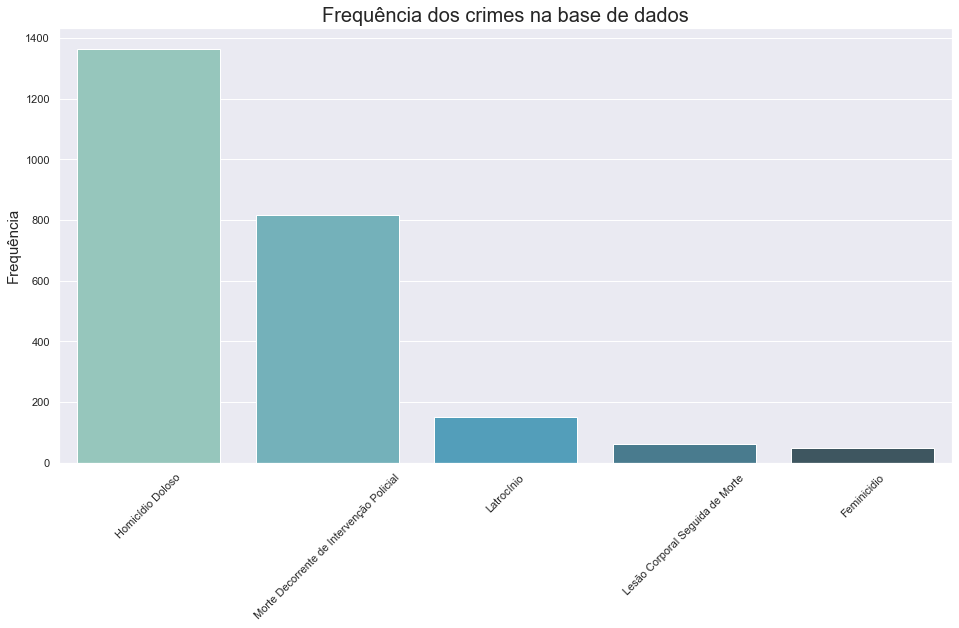

In [55]:
crime_counts = dfClean.CRIME.value_counts()

sns.set(rc={'figure.figsize':(16,8)})

x = list(crime_counts.keys())
y = list(crime_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=45)
plt.title("Frequência dos crimes na base de dados", fontdict = {'fontsize': 20})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

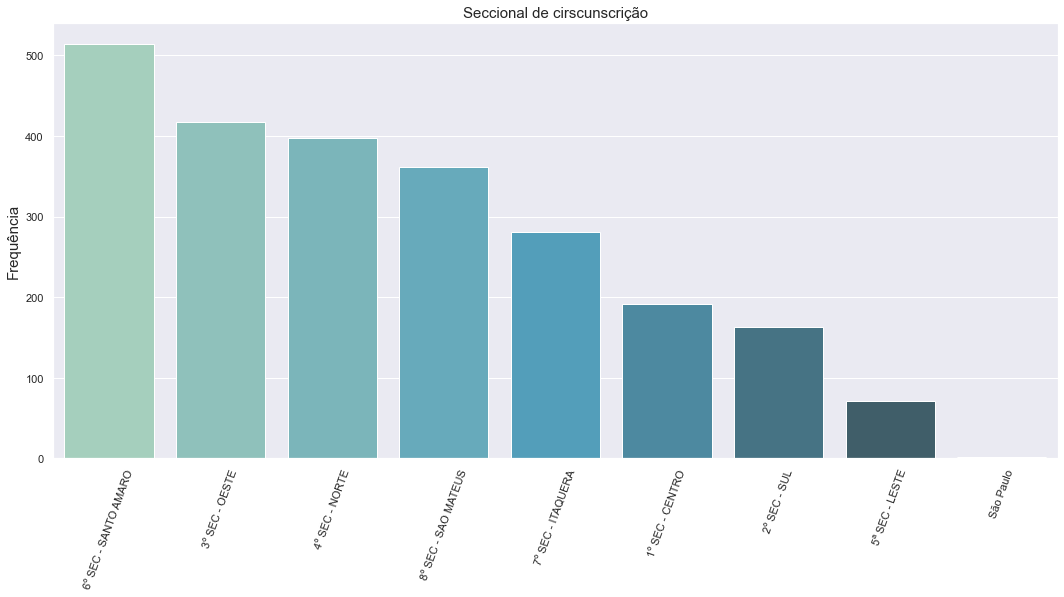

In [68]:
map_sec = {
    "1ª SEC" : "1º SEC - CENTRO",
    "DEL.SEC.1º CENTRO" : "1º SEC - CENTRO",
    "2ª SEC" : "2º SEC - SUL",
    "DEL.SEC.2º SUL" : "2º SEC - SUL",
    "3ª SEC" : "3º SEC - OESTE",
    "DEL.SEC.3º OESTE" : "3º SEC - OESTE",
    "4ª SEC" : "4º SEC - NORTE",
    "DEL.SEC.4º NORTE" : "4º SEC - NORTE",
    "5ª SEC" : "5ª SEC - LESTE",
    "DEL.SEC.5º LESTE " : "5º SEC - LESTE",
    "6ª SEC" : "6º SEC - SANTO AMARO",
    "DEL.SEC.6º SANTO AMARO" : "6º SEC - SANTO AMARO",
    "7ª SEC" : "7º SEC - ITAQUERA",
    "DEL.SEC.7º ITAQUERA" : "7º SEC - ITAQUERA",
    "8ª SEC" : "8º SEC - SAO MATEUS",
    "DEL.SEC.8º SAO MATEUS" : "8º SEC - SAO MATEUS",
    "São Paulo" : "São Paulo"}

sec_counts = dfClean.SECCIONAL_CIRCUNSCRICAO.map(map_sec).value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(sec_counts.keys())
y = list(sec_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=70)
plt.title("Seccional de cirscunscrição", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

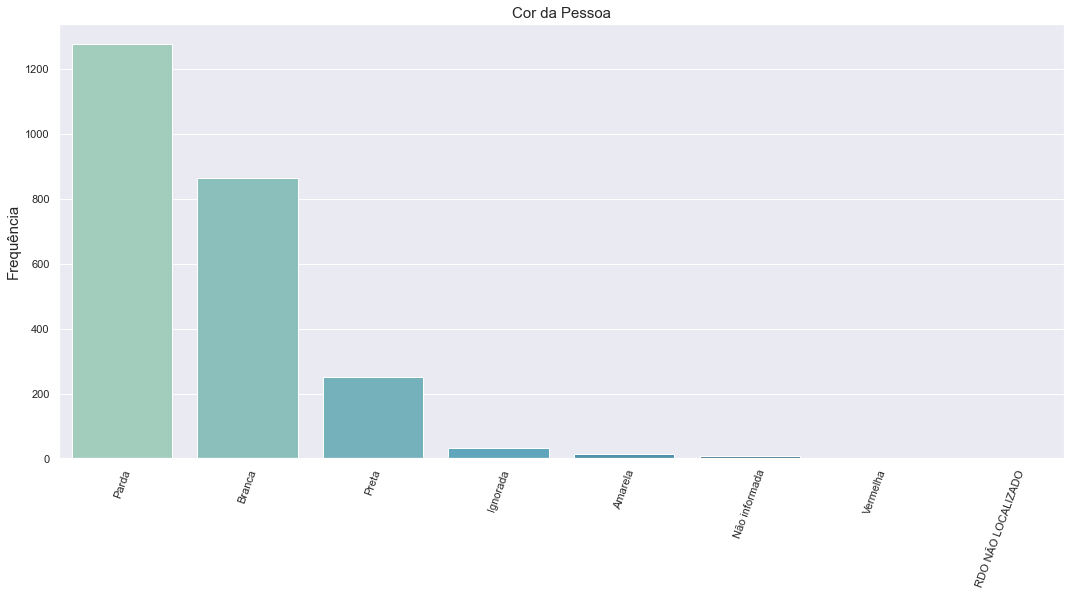

In [73]:
color_counts = dfClean.COR_PELE.str.strip().value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(color_counts.keys())
y = list(color_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=70)
plt.title("Cor da Pessoa", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

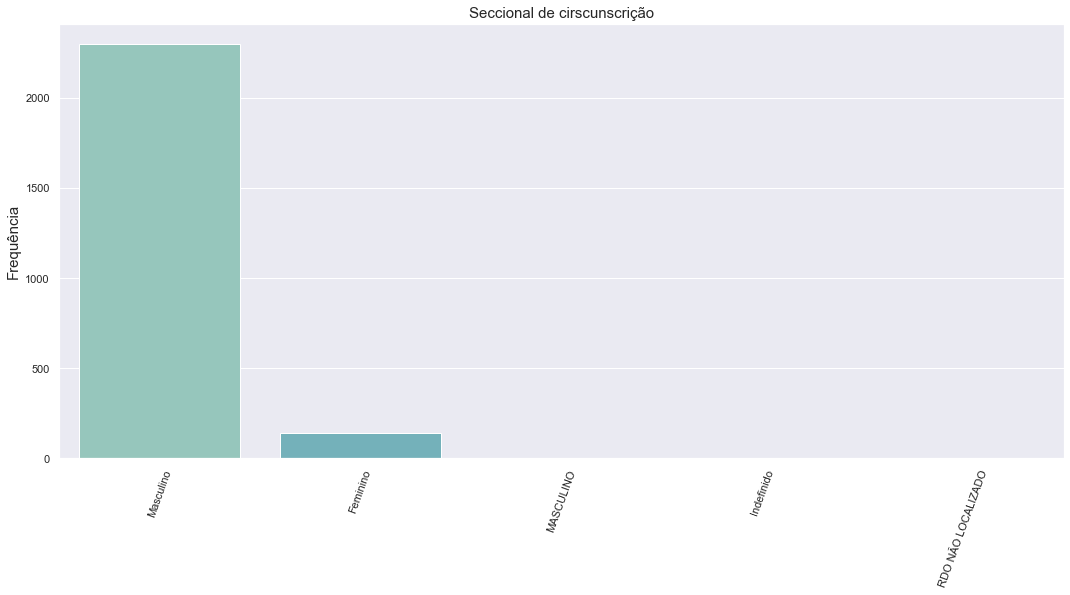

In [74]:
sex_counts = dfClean.SEXO_PESSOA.str.strip().value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(sex_counts.keys())
y = list(sex_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=70)
plt.title("Seccional de cirscunscrição", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

Masculino             2296
Feminino               142
MASCULINO                5
Indefinido               2
RDO NÃO LOCALIZADO       1
Name: SEXO_PESSOA, dtype: int64